# Evaluating embedding models 

Evaluating the accuracy of w2v models. 
See https://arxiv.org/pdf/1801.09536.pdf and http://www.aclweb.org/anthology/D15-1036

useful tutorial: 
https://github.com/parulsethi/gensim/blob/wordrank_wrapper/docs/notebooks/Wordrank_comparisons.ipynb

In [1]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import Word2Vec
from gensim.models import FastText
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import pandas as pd
import logging
import matplotlib.pyplot as plt

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [15]:
#set paths

models = "../../embedding_models/"
AEM_folder = '/AEM_corpus/'
word_analogies_dutchembbedings = '../model_evaluation/analogies/question-words.txt' # Tulkens et al.
similarity_file = '../model_evaluation/similarities/wordsim353/wordsim353_nl_kort.tsv'

### Load models (AEM, COW, WIKI)

### AEM: 
this is trained on VK, Tel, AD, Trouw, NRC 2000-01-01 - 2015-12-31. training on a 1181701742 raw words (901179101 effective words)

### COW:
https://github.com/clips/dutchembeddings


### FastText Wiki Model (Dutch):
https://github.com/facebookresearch/fastText/blob/master/pretrained-vectors.md

In [16]:
print('\nLoading AEM embeddings')

import gensim 

new_model = 'w2v_model_nr_5_window_10_size_300_negsample_5'

aem = gensim.models.Word2Vec.load(models + AEM_folder + new_model)
print(aem)



Loading AEM embeddings
Word2Vec(vocab=1055100, size=300, alpha=0.025)


In [18]:
for i in aem.wv.accuracy("../model_evaluation/analogies/question-words.txt"):
    results[i['section']] = len(i['correct']) / (len(i['incorrect']) + len(i['correct'])) * 100
    print(results)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).
  """Entry point for launching an IPython kernel.


NameError: name 'results' is not defined

In [7]:
print('\nLoading COW embeddings')

cow = gensim.models.KeyedVectors.load_word2vec_format(models + 'cow-big.txt', binary=False)

print(len(cow.vocab))

2019-07-16 14:51:10,151 : INFO : loading projection weights from ../../embedding_models/cow-big.txt



Loading COW embeddings


2019-07-16 15:13:22,117 : INFO : loaded (3110718, 320) matrix from ../../embedding_models/cow-big.txt


3110718


In [8]:
print('\nLoading (FastText) Wikipedia Model')

wiki = KeyedVectors.load_word2vec_format(models + 'wiki.nl.vec')

print(len(wiki.vocab))

2019-07-16 15:14:40,216 : INFO : loading projection weights from ../../embedding_models/wiki.nl.vec



Loading (FastText) Wikipedia Model


2019-07-16 15:21:04,999 : INFO : loaded (871022, 300) matrix from ../../embedding_models/wiki.nl.vec


871022


In [19]:
import gensim
import os
from collections import defaultdict

class word2vec_intrinsic_evaluation():
    '''This class tests the intrinsic accuracy of word2vec models.'''

    def __init__(self, path_to_embeddings, sample_size, path_to_evaluation_data):
        self.nmodel = 0
        self.samplesize = sample_size
        self.basepath = path_to_embeddings
        self.path_to_evaluation_data = path_to_evaluation_data

    def get_w2v_model(self):
        '''yields a dict with one item. key is the filename, value the gensim model'''

        filenames = [e for e in os.listdir(self.basepath) if not e.startswith('.')]

        for fname in filenames:
            model = {}
            path = os.path.join(self.basepath, fname)
            print("\nLoading gensim model")

            if fname.startswith('w2v'):
                mod = gensim.models.Word2Vec.load(path)
            else:
                mod = gensim.models.KeyedVectors.load_word2vec_format(path)

            model['gensimmodel'] = mod
            model['filename'] = fname
            self.nmodel +=1
            print("loaded gensim model nr {}, named: {}".format(self.nmodel, model['filename']))
            yield model

    def get_analogy_accuracy(self, model, evaluation_file):
        results = {}
        acc = []
        for i in model.wv.accuracy(evaluation_file):
            results[i['section']] = len(i['correct']) / (len(i['incorrect']) + len(i['correct'])) * 100
        acc.append(results)
        return acc

    def get_scores(self):
        final_results = []
        evaluation_data = defaultdict(int)
        for model in self.get_w2v_model():
            print('starting evaluation data')
            evaluation_data[model['filename']] = self.get_analogy_accuracy(model['gensimmodel'], self.path_to_evaluation_data)
            final_results.append(evaluation_data)
            print(final_results)
        return final_results


In [20]:
path = "/Users/anne/repos/embedding_models/test/"
get_ = word2vec_intrinsic_evaluation(path_to_embeddings= path, sample_size = "large", path_to_evaluation_data="../model_evaluation/analogies/question-words.txt")
result = get_.get_scores()


Loading gensim model
loaded gensim model nr 1, named: w2v_model_nr_0_window_5_size_100_negsample_5
starting evaluation data


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:38: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).


[defaultdict(<class 'int'>, {'w2v_model_nr_0_window_5_size_100_negsample_5': [{'infinitive': 68.29710144927536, 'nationalities': 27.380952380952383, 'diminutives': 27.205882352941174, 'country': 49.465240641711226, 'pasttense': 71.68560606060606, 'currency': 8.928571428571429, 'gender': 68.84057971014492, 'plural': 54.516129032258064, 'opposites': 14.545454545454545, 'superlative': 46.15384615384615, 'comparative': 73.9784946236559, 'total': 57.60233918128655}]})]

Loading gensim model
loaded gensim model nr 2, named: cow-320.txt
starting evaluation data


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:38: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


[defaultdict(<class 'int'>, {'w2v_model_nr_0_window_5_size_100_negsample_5': [{'infinitive': 68.29710144927536, 'nationalities': 27.380952380952383, 'diminutives': 27.205882352941174, 'country': 49.465240641711226, 'pasttense': 71.68560606060606, 'currency': 8.928571428571429, 'gender': 68.84057971014492, 'plural': 54.516129032258064, 'opposites': 14.545454545454545, 'superlative': 46.15384615384615, 'comparative': 73.9784946236559, 'total': 57.60233918128655}], 'cow-320.txt': [{'infinitive': 68.3076923076923, 'nationalities': 23.57142857142857, 'diminutives': 51.31578947368421, 'country': 43.465909090909086, 'pasttense': 68.14516129032258, 'currency': 5.555555555555555, 'gender': 73.16017316017316, 'plural': 59.46969696969697, 'opposites': 30.0, 'superlative': 47.72727272727273, 'comparative': 79.63709677419355, 'total': 58.98449857639987}]}), defaultdict(<class 'int'>, {'w2v_model_nr_0_window_5_size_100_negsample_5': [{'infinitive': 68.29710144927536, 'nationalities': 27.380952380952

In [23]:
ed = {k:v for element in result for k,v in element.items()}
d = {k: {k: v for ed in L for k, v in ed.items()} for k, L in ed.items()}
df = pd.DataFrame.from_records(d).transpose()

In [24]:
ed

{'w2v_model_nr_0_window_5_size_100_negsample_5': [{'infinitive': 68.29710144927536,
   'nationalities': 27.380952380952383,
   'diminutives': 27.205882352941174,
   'country': 49.465240641711226,
   'pasttense': 71.68560606060606,
   'currency': 8.928571428571429,
   'gender': 68.84057971014492,
   'plural': 54.516129032258064,
   'opposites': 14.545454545454545,
   'superlative': 46.15384615384615,
   'comparative': 73.9784946236559,
   'total': 57.60233918128655}],
 'cow-320.txt': [{'infinitive': 68.3076923076923,
   'nationalities': 23.57142857142857,
   'diminutives': 51.31578947368421,
   'country': 43.465909090909086,
   'pasttense': 68.14516129032258,
   'currency': 5.555555555555555,
   'gender': 73.16017316017316,
   'plural': 59.46969696969697,
   'opposites': 30.0,
   'superlative': 47.72727272727273,
   'comparative': 79.63709677419355,
   'total': 58.98449857639987}]}

In [27]:
import pandas as pd
d = {k: {k: v for ed in L for k, v in ed.items()} for k, L in ed.items()}
df = pd.DataFrame.from_records(d).transpose()

In [28]:
df

,comparative,country,currency,diminutives,gender,infinitive,nationalities,opposites,pasttense,plural,superlative,total
cow-320.txt,79.637097,43.465909,5.555556,51.315789,73.160173,68.307692,23.571429,30.000000,68.145161,59.469697,47.727273,58.984499
w2v_model_nr_0_window_5_size_100_negsample_5,73.978495,49.465241,8.928571,27.205882,68.840580,68.297101,27.380952,14.545455,71.685606,54.516129,46.153846,57.602339


# Intrinsic metrics 
## 1. Word analogies/ relationships

Please find the complete analogy-testing file here: https://raw.githubusercontent.com/tmikolov/word2vec/master/questions-words.txt (in English)

and a Dutch version: https://github.com/clips/dutchembeddings

In [9]:
def print_analogy_accuracy(model, questions_file):
    results = {}
    acc = []
    for i in model.wv.accuracy(questions_file): 
        results[i['section']] = len(i['correct']) / (len(i['incorrect']) + len(i['correct'])) * 100
    acc.append(results)
    return acc

evaluation_data = {}
evaluation_data['aem'] = []
evaluation_data['cow'] = []
evaluation_data['wiki'] = []

In [10]:
evaluation_data['cow'] += print_analogy_accuracy(cow, word_analogies_dutchembbedings)
evaluation_data['aem'] += print_analogy_accuracy(aem, word_analogies_dutchembbedings)
evaluation_data['wiki'] += print_analogy_accuracy(wiki, word_analogies_dutchembbedings)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).
  after removing the cwd from sys.path.
2019-07-16 15:22:01,928 : INFO : precomputing L2-norms of word weight vectors
2019-07-16 15:29:09,515 : INFO : infinitive: 72.6% (472/650)
2019-07-16 15:29:12,278 : INFO : nationalities: 24.3% (102/420)
2019-07-16 15:29:14,614 : INFO : diminutives: 50.8% (193/380)
2019-07-16 15:29:21,669 : INFO : country: 44.5% (470/1056)
2019-07-16 15:29:27,756 : INFO : pasttense: 68.8% (682/992)
2019-07-16 15:29:28,174 : INFO : currency: 4.2% (3/72)
2019-07-16 15:29:30,986 : INFO : gender: 72.9%

In [11]:
evaluation_data

#create df

d = {k: {k: v for evaluation_data in L for k, v in evaluation_data.items()} for k, L in evaluation_data.items()}
df = pd.DataFrame.from_records(d).transpose()

In [12]:
# combine syntatic and semantic categories

df['syntactic'] = ( df['comparative'] + df['pasttense'] + df['diminutives'] + df['infinitive'] + df['plural'] + df['superlative'] ) / 6
df['semantic'] = ( df['country'] + df['currency'] + df['gender'] + df['nationalities'] + df['opposites'] ) / 5

df = df[['syntactic' , 'semantic', 'total' ]]

In [13]:
df = df.transpose()
df.columns

Index(['aem', 'cow', 'wiki'], dtype='object')

In [15]:
df.to_pickle('../resources/evaluation_data_nr5')
df = pd.read_pickle('../resources/evaluation_data_nr5')

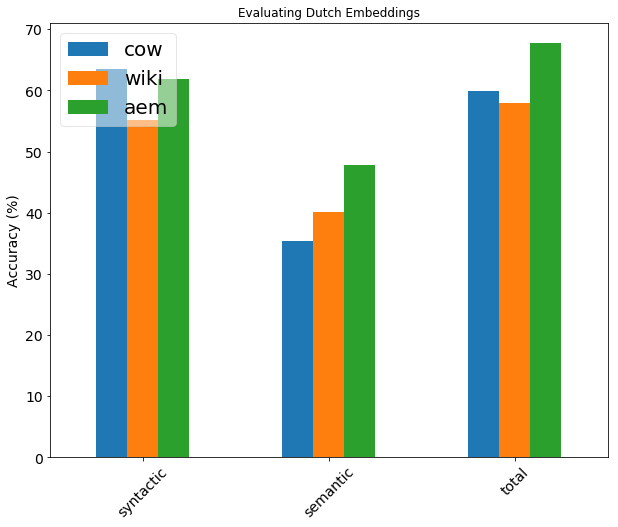

In [14]:
ax = df[['cow', 'wiki', 'aem']].plot(kind='bar', title ="Evaluating Dutch Embeddings", figsize=(10, 8), legend=True, fontsize=14)
ax.set_xlabel("", fontsize=14)
ax.set_ylabel("Accuracy (%)", fontsize=14)
ax.set_facecolor('white')
ax.legend(fancybox=True, framealpha=0.5, prop={'size': 20}, loc=2)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()
#plt.style.use('seaborn-dark')

In [332]:
#print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


## 2. Word similarity task

In [363]:
def print_similarity_accuracy(model, similarity_file):
    acc = model.wv.evaluate_word_pairs(similarity_file)
    print('Pearson correlation coefficient: {:.2f}'.format(acc[0][0]))
    print('Spearman rank correlation coefficient: {:.2f}'.format(acc[1][0]))

In [364]:
print('\nWordSim-353 similarity word2vec')
print_similarity_accuracy(aem, similarity_file)


WordSim-353 similarity word2vec


2019-01-31 10:32:21,436 : INFO : Skipping invalid line #2 in ../model_evaluation/similarities/wordsim353/wordsim353_nl_kort.tsv
2019-01-31 10:32:21,453 : INFO : Skipping invalid line #7 in ../model_evaluation/similarities/wordsim353/wordsim353_nl_kort.tsv
2019-01-31 10:32:21,477 : INFO : Skipping invalid line #13 in ../model_evaluation/similarities/wordsim353/wordsim353_nl_kort.tsv
2019-01-31 10:32:21,486 : INFO : Skipping invalid line #18 in ../model_evaluation/similarities/wordsim353/wordsim353_nl_kort.tsv
2019-01-31 10:32:21,500 : INFO : Skipping invalid line #24 in ../model_evaluation/similarities/wordsim353/wordsim353_nl_kort.tsv
2019-01-31 10:32:21,507 : INFO : Skipping invalid line #25 in ../model_evaluation/similarities/wordsim353/wordsim353_nl_kort.tsv
2019-01-31 10:32:21,521 : INFO : Skipping invalid line #28 in ../model_evaluation/similarities/wordsim353/wordsim353_nl_kort.tsv
2019-01-31 10:32:21,522 : INFO : Skipping invalid line #29 in ../model_evaluation/similarities/word

Pearson correlation coefficient: 0.64
Spearman rank correlation coefficient: 0.64


In [365]:
print('\nWordSim-353 similarity word2vec')
print_similarity_accuracy(wiki, similarity_file)


WordSim-353 similarity word2vec


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
2019-01-31 10:32:31,016 : INFO : Skipping invalid line #2 in ../model_evaluation/similarities/wordsim353/wordsim353_nl_kort.tsv
2019-01-31 10:32:31,026 : INFO : Skipping invalid line #7 in ../model_evaluation/similarities/wordsim353/wordsim353_nl_kort.tsv
2019-01-31 10:32:31,042 : INFO : Skipping invalid line #13 in ../model_evaluation/similarities/wordsim353/wordsim353_nl_kort.tsv
2019-01-31 10:32:31,053 : INFO : Skipping invalid line #18 in ../model_evaluation/similarities/wordsim353/wordsim353_nl_kort.tsv
2019-01-31 10:32:31,063 : INFO : Skipping invalid line #24 in ../model_evaluation/similarities/wordsim353/wordsim353_nl_kort.tsv
2019-01-31 10:32:31,065 : INFO : Skipping invalid line #25 in ../model_evaluation/similarities/wordsim353/wordsim353_nl_kort.tsv
2019-01-31 10:32:31,07

Pearson correlation coefficient: 0.66
Spearman rank correlation coefficient: 0.63


## 3. Concept categorization

### Word2Vec 

In [504]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import numpy as np

%matplotlib inline

keys = ['hond', 'kat', 'roodborstje', 'kraai', 'fiets']
#keys = ['hond']

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=2, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

In [501]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(facecolor = 'w', figsize=(14, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.8, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4, fancybox=True, framealpha=0.5, prop={'size': 12})
    plt.grid(False)
   # plt.style.use('seaborn-dark')
    plt.savefig("similiar.png", facecolor='w', edgecolor='w', dpi=1000)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


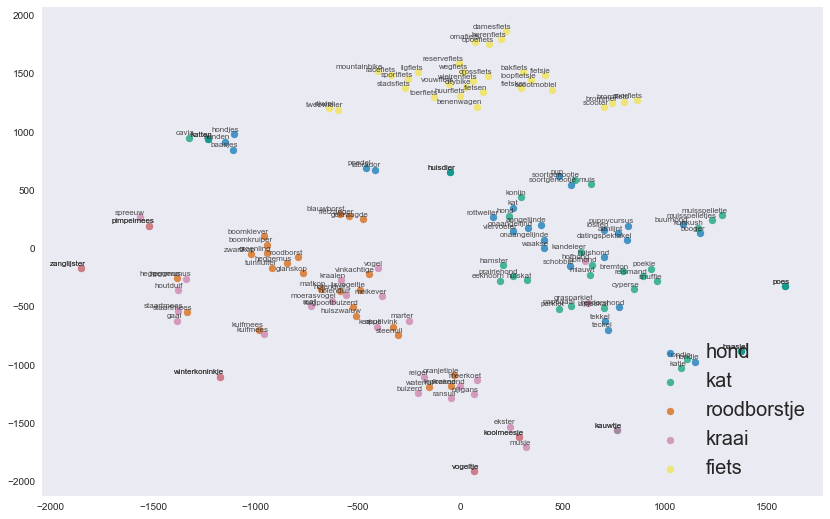

In [503]:
keys = ['hond', 'kat', 'roodborstje', 'kraai', 'fiets']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in unique_w2v.most_similar(word, topn=20):
        words.append(similar_word)
        embeddings.append(unique_w2v[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
    
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words('Similar words from AEM', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')